In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("../data/data_1.csv", parse_dates=["datetime_cet"], index_col="datetime_cet")
df

,price,solar,hydro,wind,nuclear,lignite,X
datetime_cet,,,,,,,
2019-01-01 00:00:00,51.00,0.0,69.0,0.0,694.0,246.0,1144
2019-01-01 01:00:00,46.27,0.0,134.0,0.0,695.0,262.0,1087
2019-01-01 02:00:00,39.78,0.0,68.0,0.0,695.0,250.0,1016
2019-01-01 03:00:00,27.87,0.0,67.0,0.0,694.0,250.0,952
2019-01-01 04:00:00,-0.36,0.0,67.0,0.0,694.0,218.0,919
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,46.00,0.0,788.0,1.0,697.0,242.0,1552
2019-12-31 20:00:00,42.20,0.0,791.0,1.0,697.0,244.0,1448
2019-12-31 21:00:00,39.74,0.0,725.0,1.0,697.0,244.0,1299


In [146]:
df.describe()

,price,solar,hydro,wind,nuclear,lignite,X
count,8760.000000,8758.000000,8710.000000,8710.000000,8710.000000,8710.000000,8760.000000
mean,48.746122,28.005024,494.752813,0.532262,631.391504,458.903674,1009.446233
std,18.222853,42.377871,255.251514,0.613362,187.323100,182.483452,291.711605
min,-20.230000,0.000000,40.000000,0.000000,0.000000,0.000000,480.000000
25%,37.700000,0.000000,286.250000,0.000000,680.000000,317.000000,817.000000
50%,46.600000,1.000000,488.000000,0.000000,691.000000,467.000000,989.000000
75%,57.440000,45.000000,701.000000,1.000000,696.000000,548.000000,1200.000000
max,200.020000,422.000000,1016.000000,5.000000,700.000000,906.000000,1959.000000


In [147]:
df.isna().sum()

price       0
solar       2
hydro      50
wind       50
nuclear    50
lignite    50
X           0
dtype: int64

In [148]:
df.dtypes

price      float64
solar      float64
hydro      float64
wind       float64
nuclear    float64
lignite    float64
X            int64
dtype: object

In [42]:
df.index.dtype

dtype('<M8[ns]')

filtering and creating df peak

In [149]:
df_peak = df[(df.index.dayofweek <= 4) &
             (df.index.hour >= 8) &
             (df.index.hour < 20)].copy()
df_peak

,price,solar,hydro,wind,nuclear,lignite,X
datetime_cet,,,,,,,
2019-01-01 08:00:00,1.53,5.0,189.0,0.0,694.0,221.0,1141
2019-01-01 09:00:00,0.41,27.0,183.0,0.0,694.0,220.0,1270
2019-01-01 10:00:00,14.34,57.0,208.0,0.0,694.0,217.0,1361
2019-01-01 11:00:00,41.03,73.0,234.0,0.0,694.0,239.0,1422
2019-01-01 12:00:00,48.97,65.0,208.0,0.0,695.0,240.0,1402
...,...,...,...,...,...,...,...
2019-12-31 15:00:00,39.58,12.0,547.0,1.0,697.0,243.0,1239
2019-12-31 16:00:00,42.28,0.0,734.0,1.0,697.0,243.0,1305
2019-12-31 17:00:00,46.64,0.0,780.0,1.0,697.0,245.0,1483


### What’s the price value of

#### a) baseload product for the whole year 2019 in €/MWh?

In [118]:
print(f"Baseload product avg hourly price for 2019: {df[df.index.year == 2019].price.mean():.2f} €/MWh")

Baseload product avg price for 2019: 48.75 €/MWh


#### What about the value of individual months throughout the 2019 be?

In [125]:
monthly = df[df.index.year == 2019].groupby(df.index.month).price.mean()
monthly.index = pd.to_datetime(monthly.index, format="%m").month_name()
monthly

datetime_cet
January      68.764946
February     49.704524
March        39.585491
April        45.614597
May          41.317473
June         39.970778
July         51.245188
August       54.588481
September    55.334889
October      55.216658
November     43.839569
December     39.512782
Name: price, dtype: float64

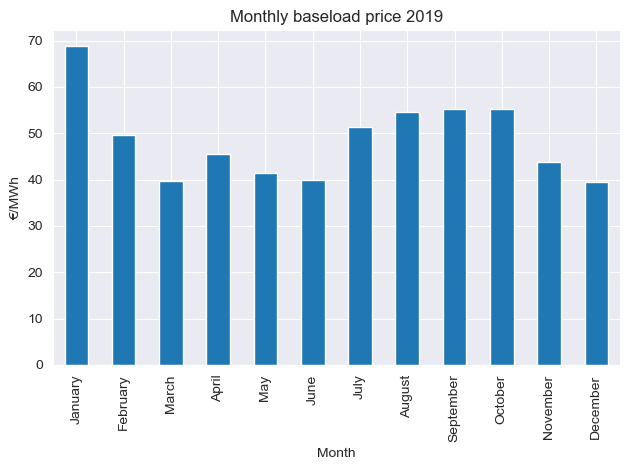

In [120]:
monthly.plot(kind="bar", title="Monthly baseload price 2019", ylabel="€/MWh", xlabel="Month")
plt.tight_layout()
plt.show()

#### Calculate the price value of individual monthly peakload products for year 2019.

In [121]:
monthly_peak = df_peak[df_peak.index.year == 2019].groupby(df_peak.index.month).price.mean()
monthly_peak.index = pd.to_datetime(monthly_peak.index, format="%m").month_name()
monthly_peak

datetime_cet
January      81.604638
February     58.295583
March        47.948611
April        53.210909
May          47.296341
June         49.836292
July         60.180036
August       69.953561
September    66.917103
October      67.110072
November     54.577698
December     48.133939
Name: price, dtype: float64

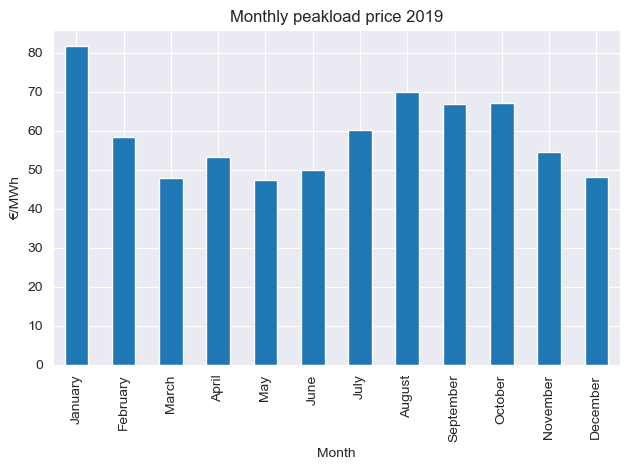

In [123]:
monthly_peak.plot(kind="bar", title="Monthly peakload price 2019", ylabel="€/MWh", xlabel="Month")
plt.tight_layout()
plt.show()

### How much of electricity in

#### c) MWh was produced by individual power plants in 2019 in Slovenia.

In [76]:
df.columns

Index(['price', 'solar', 'hydro', 'wind', 'nuclear', 'lignite', 'X'], dtype='object')

In [128]:
production_by_plants = df.loc[df.index.year == 2019, ['solar', 'hydro', 'wind', 'nuclear', 'lignite']].sum()
production_by_plants

solar       245268.0
hydro      4309297.0
wind          4636.0
nuclear    5499420.0
lignite    3997051.0
dtype: float64

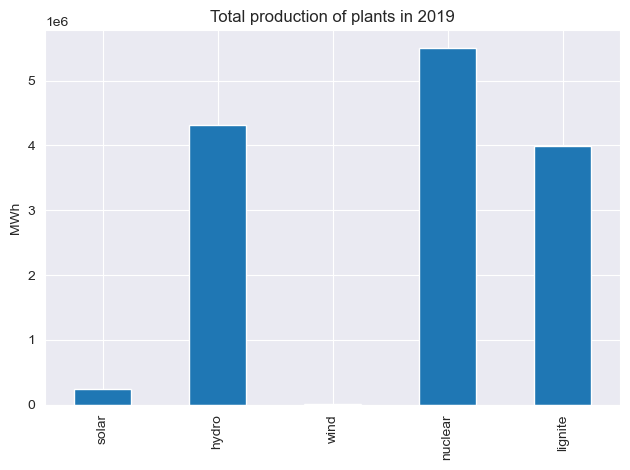

In [133]:
production_by_plants.plot(kind="bar", title="Total production of plants in 2019", ylabel="MWh")
plt.tight_layout()
plt.show()

#### What was the total consumption of Consumer X in MWh?

In [142]:
print(f"Total consumption of consumer X in MWh for year 2019 was {(df.loc[df.index.year == 2019, ['X']].sum().item() / 1000):.2f} [MWh]")

Total consumption of consumer X in MWh for year 2019 was 8842.75 [MWh]


### Calculate the

#### d) average value of power produced by power plant type in 2019.

In [137]:
avg_production_by_plants = df.loc[df.index.year == 2019, ['solar', 'hydro', 'wind', 'nuclear', 'lignite']].mean()
avg_production_by_plants

solar       28.005024
hydro      494.752813
wind         0.532262
nuclear    631.391504
lignite    458.903674
dtype: float64

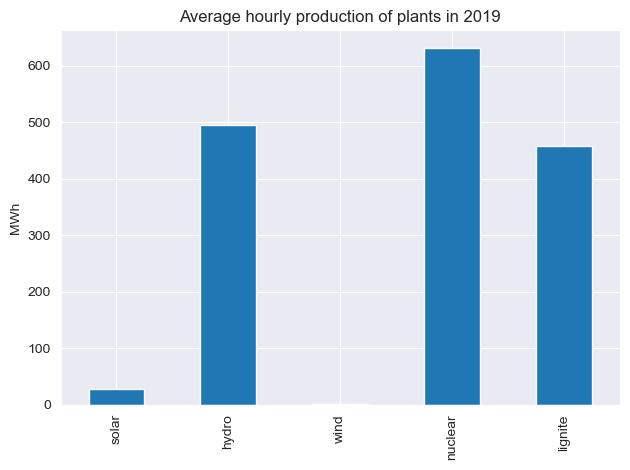

In [141]:
avg_production_by_plants.plot(kind="bar", title="Average hourly production of plants in 2019", ylabel="MWh")
plt.tight_layout()
plt.show()

####  What is average value of power consumed by the consumer X?

In [140]:
print(f"Average hourly consumption of consumer X in MWh for year 2019 was {(df.loc[df.index.year == 2019, ['X']].mean().item() / 1000):.2f} [MWh]")

Average Hourly consumption of consumer X in MWh for year 2019 was 1.01 [MWh]
